# **Import and Clean the data**

In [ ]:
import pandas as pd
import numpy as np
import math
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

/home/sairamv/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sairamv/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sairamv/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sairamv/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

In [ ]:
np.random.seed(999)

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.221637  0.383930 -1.234899 -1.485419   
13          11.0   1.069374   0.287722  0.828613  2.712520 -0.178398   
14          12.0  -2.791855  -0.327771  1.641750  1.767473 -0.136588   
15          12.0  -0.752417   0.345485  2.057323 -1.468643 -1.158394   
16          12.0   1.103215  -0.040296  1.267332  1.289091 -0.735997   
17          13.0  -0.436905   0.918966  0.924591 -0.727219  0.915679   
18          14.0  -5.401258  -5.450148  1.186305  1.736239  3.049106   
19          15.0   1.492936  -1.029346  0.454795 -1.438026 -1.555434   
20          16.0   0.694885  -1.361819  1.029221  0.834159 -1.191209   
21          17.0   0.962496   0.328461 -0.171479  2.109204  1.129566   
22          18.0   1.166616   0.502120 -0.067300  2.261569  0.428804   
23          18.0   0.247491   0.277666  1.185471 -0.092603 -1.314394   
24          22.0  -1.946525  -0.044901 -0.405570 -1.013057  2.941968   
25          22.0  -2.074295  -0.121482  1.322021  0.410008  0.295198   
26          23.0   1.173285   0.353498  0.283905  1.133563 -0.172577   
27          23.0   1.322707  -0.174041  0.434555  0.576038 -0.836758   
28          23.0  -0.414289   0.905437  1.727453  1.473471  0.007443   
29          23.0   1.059387  -0.175319  1.266130  1.186110 -0.786002   
...          ...        ...        ...       ...       ...       ...   
284777  172764.0   2.079137  -0.028723 -1.343392  0.358000 -0.045791   
284778  172764.0  -0.764523   0.588379 -0.907599 -0.418847  0.901528   
284779  172766.0   1.975178  -0.616244 -2.628295 -0.406246  2.327804   
284780  172766.0  -1.727503   1.108356  2.219561  1.148583 -0.884199   
284781  172766.0  -1.139015  -0.155510  1.894478 -1.138957  1.451777   
284782  172767.0  -0.268061   2.540315 -1.400915  4.846661  0.639105   
284783  172768.0  -1.796092   1.929178 -2.828417 -1.689844  2.199572   
284784  172768.0  -0.669662   0.923769 -1.543167 -1.560729  2.833960   
284785  172768.0   0.032887   0.545338 -1.185844 -1.729828  2.932315   
284786  172768.0  -2.076175   2.142238 -2.522704 -1.888063  1.982785   
284787  172769.0  -1.029719  -1.110670 -0.636179 -0.840816  2.424360   
284788  172770.0   2.007418  -0.280235 -0.208113  0.335261 -0.715798   
284789  172770.0  -0.446951   1.302212 -0.168583  0.981577  0.578957   
284790  172771.0  -0.515513   0.971950 -1.014580 -0.677037  0.912430   
284791  172774.0  -0.863506   0.874701  0.420358 -0.530365  0.356561   
284792  172774.0  -0.724123   1.485216 -1.132218 -0.607190  0.709499   
284793  172775.0   1.971002  -0.699067 -1.697541 -0.617643  1.718797   
284794  172777.0  -1.266580  -0.400461  0.956221 -0.723919  1.531993   
284795  172778.0 -12.516732  10.187818 -8.476671 -2.510473 -4.586669   
284796  172780.0   1.884849  -0.143540 -0.999943  1.506772 -0.035300   
284797  172782.0  -0.241923   0.712247  0.399806 -0.463406  0.244531   
284798  172782.0   0.219529   0.881246 -0.635891  0.960928 -0.152971   
284799  172783.0  -1.775135  -0.004235  1.189786  0.331096  1.196063   
284800  172784.0   2.039560  -0.175233 -1.196825  0.

In [ ]:
df = df.sample(frac= 1,random_state = 999)#,ignore_index= True)
df = df.reset_index(drop = True)

In [ ]:
df = df.drop_duplicates()

In [ ]:
# features = ['Time','Amount']
features = df.columns.tolist()
features.remove('Class')
for col in features:
  scaler = StandardScaler()
  df[col] = scaler.fit_transform(df[col].values.reshape(-1,1))

In [ ]:
df

Time        V1        V2        V3        V4        V5        V6  \
0      -1.051244 -1.563636 -0.640295  0.974381 -0.125999 -1.478739  0.735346   
1       1.257976  1.068351 -0.148749 -1.017452  0.038642  0.245106 -0.162481   
2      -0.281525 -2.267118 -5.757708 -2.301764  1.177511 -2.432818 -0.241907   
3       1.354162 -2.687516 -0.019180 -1.220634  0.342421  2.098917 -0.555045   
4      -1.006868  0.655794  0.218017  0.104002  0.431558 -0.136997 -0.648912   
5      -1.913505 -0.452925  0.703981 -0.239933  0.251972  1.643650  2.943862   
6      -0.273985  0.482780 -0.299425  0.740977  0.385550 -0.225974  1.530891   
7       0.807206 -0.638096 -0.854298  0.223761 -2.046169  0.241878 -0.513525   
8      -1.096525 -1.043309  0.254596 -0.200631  1.148350 -0.823433 -0.120299   
9       1.120869 -0.194937  0.153610 -1.943988 -0.897250  1.715041  2.531501   
10      0.945851 -0.658547  0.639835  0.474270  0.926142  0.311590 -1.033377   
11     -0.106887 -0.134913  0.725818 -0.637999  0.002261  2.771994  2.675793   
12     -0.581624  0.578107 -0.063421  0.768251  0.816057 -0.568714  0.234184   
13     -0.665553  0.484665 -0.239918  0.654977  0.867508 -0.505782  0.551812   
14     -0.756136  0.610037  0.115905  0.094401  0.326069 -0.032433 -0.082361   
15      1.208609 -0.629255  1.126254 -0.853934 -0.939304  0.507919 -1.155270   
16     -0.993136  0.696760 -0.790624  0.241064 -1.095707 -1.024968 -0.129370   
17     -0.565344 -0.583247 -0.125889  0.934970 -1.876224  0.857608  3.323923   
18      0.987047 -2.054292 -1.535418  0.807600  1.428827  1.187600 -0.413743   
19     -0.974097 -0.509256  0.522665  0.501350 -2.151106 -0.187687 -1.309031   
20     -0.213456  0.615288  0.068185 -0.093665  0.696625 -0.178315 -0.381862   
21     -1.319752  0.505618 -0.578336  0.376744 -1.059612 -0.726640  0.073015   
22      0.731723 -0.298651  0.759407  0.152569 -0.067937 -0.218729 -1.053281   
23      0.761504 -0.006596  0.090399  0.459905  0.230013  0.728093  1.462038   
24     -1.335000 -0.941720  0.876316 -0.811112  0.835175 -0.721243 -0.784033   
25      1.427244 -1.183487  0.591037 -0.039970 -2.498598 -0.522989 -0.130287   
26     -1.288897  0.816643 -0.560644 -0.371751 -1.066451 -0.608905 -0.672432   
27     -0.325711  0.228139 -0.946826  0.400696  0.209664 -0.788648  0.560048   
28      0.903497 -0.200291  0.374458 -0.421228 -1.499033  0.331876 -1.207611   
29     -0.758748 -1.241971  1.101609  0.630679  0.543266 -0.384182 -0.451329   
...          ...       ...       ...       ...       ...       ...       ...   
284777  0.906572  0.973948 -0.232065 -1.151878  0.215012  0.129217 -0.590546   
284778 -0.879470 -0.757620 -1.150577  1.198569 -1.802757 -0.179162  1.212398   
284779 -0.901121 -1.099430  0.212060  0.226652 -1.118331 -0.895988 -0.799594   
284780 -0.754662  0.167222 -1.401483 -0.189452 -0.226259 -1.020856 -0.177610   
284781 -1.161836  0.597143 -0.011594  0.330177  0.615280 -0.426639 -0.524473   
284782 -0.599379  0.725155 -0.558706  0.197721 -1.028508 -0.931480 -0.625632   
284783 -1.030162  0.543825 -0.389768  0.103656 -0.617697 -0.575956 -0.549207   
284784 -1.377311 -1.491633  1.179062  0.632759 -1.588644  0.320919 -0.140675   
284785  0.704997  1.045616 -0.067867 -0.782885  0.161968  0.042459 -0.531486   
284786  1.289083 -0.363247 -0.170644  0.150954 -1.101529 -2.467282  1.082091   
284787 -1.194880 -0.641276  0.854140 -0.098078 -0.061849  0.787754 -0.313111   
284788 -1.443043 -0.670822  0.622848  0.981958 -1.002782 -0.199017 -0.827317   
284789  0.821886  1.111270 -0.010623 -1.982762  0.057707  0.955522 -0.393713   
284790  1.315368  1.008015 -0.293588 -0.529390  0.095386 -0.165408 -0.142720   
284791 -1.153875 -0.304292  0.029837  0.656139 -1.334612  0.281533 -0.419433   
284792 -1.085595  0.562539  0.120263  0.260205  0.710561 -0.162090 -0.274341   
284793  0.903202  1.057418 -0.037334 -0.750381  0.274147 -0.056328 -0.846269   
284794 -0.649988 -0.266154 -0.165497  1.353943 -1.737133 -0.829082 -0.687929   
284795 -0.58

In [ ]:
Counter(df['Class'])

Counter({0: 283253, 1: 473})

# **Train Test Split**

In [ ]:
fraud_df = df[df['Class'] == 1]
not_fraud_df = df[df['Class'] == 0]
not_fraud_df.reset_index(drop=True, inplace=True)
fraud_df.reset_index(drop=True, inplace=True)
not_fraud_df = not_fraud_df.head(15000)

In [ ]:
fraud_df = fraud_df.sample(frac=1).reset_index(drop=True)
not_fraud_df = not_fraud_df.sample(frac=1).reset_index(drop=True)

In [ ]:
fraud_df

Time         V1        V2         V3        V4         V5        V6  \
0    0.556579  -1.352571  1.384448  -2.483618  0.869701  -0.824103 -0.942403   
1   -1.836548   0.369466  1.399787  -3.533945  2.836021  -1.257974 -1.299659   
2    1.281586  -0.993074  2.796891  -4.723115  4.044074   0.744188 -2.393472   
3   -1.663700  -2.385912  1.764876  -1.043662  1.775065  -0.634427 -0.780645   
4   -1.308421   0.144780  1.052328  -1.096181  2.698742  -0.793573 -0.738482   
5   -1.464947  -8.871102  6.573025 -13.498892  4.277795  -9.779814 -3.127427   
6   -1.058931  -0.123633  0.218344   1.306155 -0.885761  -0.496159 -0.498970   
7   -1.819741  -0.933869  2.988999  -3.929094  4.033759   0.873319 -2.277899   
8   -0.774017  -1.353431  3.115257  -4.039207  3.910643   1.164350 -1.740893   
9    0.950695  -1.502991 -0.135986  -3.896721  1.559100  -1.406869  0.474711   
10   0.321727   0.990250  0.397651  -0.191273  2.821982   0.228194 -0.073810   
11  -0.378785  -3.399452  2.166492  -4.679931  3.031656  -3.702327 -1.327007   
12   1.250394  -0.285178  1.350100  -2.335578  0.169682   0.788407 -0.926770   
13  -1.121061  -0.541022  0.792101  -0.120644  1.833434  -0.847216  0.024748   
14  -0.926752  -4.710267  4.309426  -8.189713  3.002468  -5.212952 -2.541787   
15   0.709925  -2.364122  1.680133  -3.087563  3.680128  -1.795356 -0.267641   
16  -1.124621  -7.775252  4.483013 -10.842583  6.504046  -9.780634 -2.220308   
17  -0.620313   0.609849 -0.344295   0.491098 -0.008218  -0.454892  0.625635   
18  -1.115396  -9.828248  5.642182 -13.347174  5.530860 -11.368169 -1.251725   
19  -0.792909  -5.322816  2.761770  -6.494098  3.896932  -4.385590 -0.099370   
20   0.711526  -2.730816  1.620458  -2.818571  0.281204  -0.285555  0.514041   
21   1.184010  -1.963083  1.551875  -3.155589  1.159634  -0.849472 -1.259282   
22   1.120805  -0.544017  2.651931  -3.993657  3.753055   1.074005 -1.646246   
23   1.268781  -0.266047  2.933865  -5.286447  5.188178   0.265704 -1.542117   
24  -0.815339  -0.634277  1.190401  -0.565270  1.979911  -1.391283 -0.032881   
25   0.017205  -8.996213  7.637245 -12.620410  7.915434  -9.844946 -0.308413   
26  -0.773870  -0.139005  2.058830  -2.291150  3.090548   2.421364 -1.541208   
27   1.303131  -0.069658  0.088469  -0.594106 -0.321526   0.587347 -0.378086   
28   1.260419  -0.351863  2.840036  -4.518132  5.053429   0.673074 -1.405386   
29   1.219413   0.023182  0.798300   0.484933  1.854959   1.017084  0.397640   
..        ...        ...       ...        ...       ...        ...       ...   
443 -0.014113  -6.939339  4.991383 -10.992541  4.391470  -8.220952 -2.249421   
444 -0.405533  -0.379985  0.266991  -0.352944 -0.331042   0.465784  0.536795   
445  1.314125   0.597960  1.521329  -3.306052  3.802289   0.723287 -0.944394   
446  1.439944  -2.692333  0.380851  -3.835222  1.189278  -0.265982 -0.357493   
447 -1.809843  -1.369450  3.558953  -5.074126  4.513358  -0.045417 -2.350284   
448  0.332890  -0.568244 -1.014631  -0.381129  3.974399   0.554630  0.331659   
449 -1.634151   0.607728  0.574740   0.053504  2.140472   0.298168 -0.160125   
450 -0.145913  -0.701332 -0.275663  -0.465319  1.937655  -0.731249  2.171693   
451 -1.126832  -7.025933  4.247600  -9.128258  6.150457  -8.299744 -2.191338   
452  1.369663  -0.212538  1.905070  -2.054541  4.106162   0.645445 -0.375647   
453 -1.568609  -7.842454  5.059037 -14.807789  8.406473  -6.334876 -1.744214   
454  0.724731   0.601588  1.512867  -3.534364  3.767206   0.833995 -0.961541   
455 -0.879933   0.102749  0.845020  -0.693918  2.992298  -1.197799 -0.134960   
456  0.844905   0.615505  1.968910  -3.984901  4.047439   1.123141 -1.741779   
457 -0.194501  -1.136305  1.981667  -3.604463  2.607659  -2.228188 -0.503168   
458 -1.241447  -1.052557  2.048000  -2.610710  3.978334  -2.237507 -0.940242   
459  0.142919   0.465702  0.698072  -3.052001  1.481259  -0.344989 -1.564871   
460 -0.516861  -0.779474  0.690638  -1.062297  1.991518  -1.936325 -0.232168   
461 -1.42

In [ ]:
not_fraud_df

Time        V1        V2        V3        V4        V5        V6  \
0      1.039847 -0.143127  0.580979 -0.491713 -0.481713  0.186150 -0.993851   
1     -0.915232 -0.350627  0.412050  1.859271  2.398496 -0.889984  1.068976   
2     -0.456669  0.584179  0.242867 -0.080939  0.715918  0.364681  0.082320   
3     -0.261580  0.652455  0.389397 -0.380397  0.621887  0.061345 -1.099388   
4      0.316462  1.059899 -0.011004 -0.979364  0.128827  0.346276 -0.244276   
5     -0.190246  0.495321  0.085491 -0.055830  0.504019  0.677240  1.110716   
6      1.300267  1.028440 -0.267573 -0.270797  0.227095 -0.579474 -0.578320   
7     -1.765046 -0.740493  0.224585  1.134642 -0.549233 -1.969184  0.991374   
8     -1.209518 -0.895822 -0.820370  1.780658 -1.017453  0.159938 -0.464244   
9      0.813819 -1.117070  0.284345 -1.249896 -0.454636  0.188366 -0.757496   
10    -1.125547  0.629697  0.109878 -0.012665  0.820608  0.247969  0.298985   
11    -0.441568  0.609236  0.067439  0.391359  0.470144 -0.422692 -0.557428   
12    -0.463998  0.654799 -0.514600  0.548372 -0.556997 -0.978365 -0.152815   
13     1.024851 -0.641445 -0.011550 -1.289778 -0.666765  1.074198 -0.392749   
14     0.552072  1.051000 -0.574304 -0.879166 -0.420297 -0.608846 -0.525999   
15    -0.430069 -0.143219 -0.362260  0.860190 -0.893900 -0.629770 -0.790818   
16     1.539858 -0.403177  1.003140 -1.948946 -0.822880  1.567014  3.719971   
17    -1.119019  0.384495 -0.626256  0.621239  0.240244 -0.698578  0.720496   
18     1.264442 -0.091269  1.086779  0.059049  2.100717  1.100752 -0.534755   
19     1.277816  1.125975 -0.483381 -1.735228 -0.787216  0.273403 -0.685483   
20    -1.381439  0.549255 -0.156339  0.875889  0.532462 -0.693281  0.277382   
21     0.861586 -0.163215  0.681045 -0.109782 -0.523790  0.274443 -0.493813   
22    -0.415537 -0.301274  0.666077  0.966709  0.061818 -0.013563 -0.890249   
23    -0.642259  0.503633 -0.360785  0.269241  0.908667  0.018087  1.440941   
24    -0.356039 -0.502360  0.754268  0.978042  0.583770 -0.215759 -0.403463   
25     1.007055  0.971511 -0.286913 -1.288152  0.317997  0.127879 -0.723485   
26     0.381056 -1.211118  1.025152 -0.728457 -0.473720  0.368628 -1.061974   
27    -1.093914 -0.345059  0.295134  1.346572  0.647880 -0.215915  0.944554   
28     1.597312 -0.897720 -0.179310  1.844062 -0.995375 -1.056767  1.038926   
29     0.223477  0.023065  0.704444 -0.216367 -0.066494  0.814275 -0.446299   
...         ...       ...       ...       ...       ...       ...       ...   
14970  1.109643  1.038025  0.145460 -1.365251  0.801806  0.605782 -0.696344   
14971 -1.310295  0.576472  0.086382  0.385108  0.364038 -0.226731 -0.222904   
14972 -1.417980 -0.717247  0.821236  1.328509 -0.238394  0.231768 -0.143431   
14973  0.866493  0.537093 -0.962761 -1.414995  1.167794 -0.104287 -0.360618   
14974 -1.212846  0.551341  0.035856  0.201727  0.739077 -0.216672 -0.235272   
14975 -1.339970  0.738564 -0.689712  0.439665 -1.064533 -1.154231 -0.255123   
14976  0.906909 -0.957099  0.732871  0.936003 -0.329528 -0.652711  0.681176   
14977 -1.192395 -1.636777  0.559697  0.407967 -1.343012 -0.264226 -0.250539   
14978  0.476863 -0.791403 -1.533145  0.366697 -0.554089 -0.923577  0.476215   
14979  1.098165  1.008425 -0.213743 -0.230689  0.074751 -0.285444  0.048017   
14980  1.128556 -1.931458  1.771190 -0.151609 -1.013809 -0.739284 -0.466907   
14981 -1.080835  0.670457  0.375037 -0.521030  0.539902  0.228922 -0.887300   
14982 -0.359282  0.788659 -0.581827  0.191114 -0.991773 -1.002088 -0.614026   
14983  0.868515 -0.143884  0.575912  0.066095 -0.427931  0.132906 -0.751370   
14984  0.924390 -0.674219  0.868392  0.615515 -0.240623 -0.461623 -0.133523   
14985  0.317052  1.056049  0.028288 -0.968876  0.115057  0.438417 -0.158488   
14986 -0.565913 -0.401670 -0.193616  2.192638 -1.061865 -0.826290  0.658074   
14987  1.514310 -3.089403  1.929037 -1.256932  0.532753 -1.879935 -0.150266   
14988  1.463595 -1.128551 -0.634405 -0.785049 -1.960252  1.27

In [ ]:
training_size = 10000
test_size = 5000

train_pos,test_pos = train_test_split(fraud_df,test_size = float(1)/3)
train_neg,test_neg = train_test_split(not_fraud_df,test_size = float(1)/3)

In [ ]:
df_train = train_pos.append(train_neg.head(training_size - train_pos.shape[0]),ignore_index = True)
df_test = test_pos.append(test_neg.head(test_size - test_pos.shape[0]),ignore_index = True)

In [ ]:
df_train = df_train.sample(frac= 1,random_state = 999)#,ignore_index= True)
df_test = df_test.sample(frac= 1,random_state = 999)#,ignore_index= True)

df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [ ]:
df_train

Time         V1        V2         V3        V4         V5        V6  \
0     0.973273   1.097536 -0.495717  -1.127546 -0.701486  -0.194474 -0.742737   
1     0.551693  -0.223557  1.249240  -1.373488  0.164830   0.266529 -0.969697   
2    -0.294499  -0.382953  0.741155   0.531321  0.747083   0.146069  0.554767   
3     1.049135   1.069973  0.273835  -1.584840  0.773514   0.837613 -0.825689   
4     1.067331  -0.748500  1.335567  -1.221538 -1.001106   0.628978 -1.043007   
5     1.434447   1.118552 -0.539274  -0.983726 -0.684950  -0.380481 -0.645434   
6     0.662853  -0.476213  0.058226   0.687926  0.251135  -0.004111 -0.418614   
7     0.115560 -11.472046  9.437218 -15.156861  4.982628 -10.301305 -0.346870   
8     1.006802  -0.714757  0.530626  -0.451081 -1.156639   1.280644  3.408823   
9     0.625281   0.996070  0.413445  -0.753568  2.713116   0.524753 -0.333899   
10    1.334617   1.006240 -0.434267  -0.294613  0.386858  -0.445067  0.121308   
11    1.105389  -0.519259  0.109267   0.337912 -1.844081   0.024367  0.353067   
12   -0.255683  -0.190880  0.671772   0.748001 -0.050481   0.330650 -0.230479   
13   -1.107056  -1.298716  1.276666  -3.279483  4.567698   2.303617 -2.295669   
14   -1.748681  -1.225221  0.115690   0.989437 -0.665909   0.331708 -1.014319   
15    1.220572  -0.372750  0.489899   0.650424 -0.679266   0.515868 -0.430690   
16    1.143383   0.016709  0.582551   0.210280 -0.426388   0.398600 -0.755639   
17    0.603693   0.835103 -1.025919  -0.951969 -0.482194  -0.557511 -0.398742   
18    1.404014  -0.062998  0.469404  -0.107850 -0.668090   0.746343 -0.105904   
19   -1.972561   0.635153  0.254605   0.212419  0.488712  -0.201706 -0.782456   
20   -0.939410  -2.499538 -3.868999   1.138072 -0.610751   3.279808 -3.494104   
21   -1.922098  -0.248707  0.373453   1.267636  0.889116   0.204161  0.197217   
22    0.354477   1.052999 -0.021409  -1.044969 -0.024190   0.394736 -0.205936   
23    1.605673  -0.388530  0.723006  -0.339134 -0.157112   0.117534 -0.766996   
24   -1.728168  -0.131064  0.280102   1.458096  0.472928  -0.617624  0.020344   
25   -0.154716  -0.316094  0.378897  -0.529344 -1.310937   2.294653  2.537121   
26    1.290158  -0.219613  1.038097  -1.706970  0.627934   0.575173 -0.840895   
27    1.204186  -0.779800  1.262115  -0.966395 -0.369535  -0.467078 -0.997049   
28    1.582927  -0.534256  0.523078  -0.376037 -0.422881   0.426268 -0.506428   
29   -1.239024   0.418793 -0.755523  -0.076070 -0.403170  -0.671865 -0.411584   
...        ...        ...       ...        ...       ...        ...       ...   
9970  0.980054   1.047249 -0.097228  -0.811381  0.154859   0.027307 -0.511936   
9971 -0.496980   0.709977 -0.723450  -0.023035 -1.221687  -0.258115  1.112031   
9972  1.297908   1.027518  0.030267  -0.698433  1.057690  -0.000328 -0.628645   
9973  0.939006  -2.297352  2.448410  -1.996221 -2.683778   2.905432  2.023846   
9974  1.597312  -0.897720 -0.179310   1.844062 -0.995375  -1.056767  1.038926   
9975  0.690359   1.026630  0.145419  -1.075534  0.977724   0.369621 -0.815247   
9976 -0.227503   0.602412  0.051902   0.349186  0.603167  -0.340931 -0.501178   
9977 -1.196818   0.661468 -0.858625  -0.014259 -1.079241  -0.886422 -0.142067   
9978 -0.596514  -0.666545 -0.765102   1.457289 -0.518210   0.074920 -0.817280   
9979  0.642235   1.045798 -0.046650  -0.776238  0.158654   0.073715 -0.522871   
9980  1.006128  -1.108889  0.942233   0.217558 -0.462919  -0.899024 -0.280208   
9981 -0.304819  -0.595949  0.329058   1.345199  2.068260   0.436865 -0.134199   
9982 -0.239529  -2.100393  0.148505   0.042395  0.159004   0.200489 -0.638983   
9983 -0.274427   0.576685  0.040913   0.959607  0.999514  -0.755853 -0.274080   
9984 -1.262234   0.579913  0.121933   0.284985  1.653198   0.105082  0.592784   
9985 -1.242268   0.611085  0.261372   0.225296  1.654667   0.081029  0.008762   
9986 -0.786801  -1.108474 -1.619599   1.200531 -0.610673   1.107690 -1.269884   
9987 -0.737855  -4.241751 -2.921191  -3.5

In [ ]:
df_test

Time         V1        V2         V3        V4         V5        V6  \
0     1.514647   0.950958  0.201863   0.171751  2.726361  -0.130237  0.264793   
1    -0.900678   0.633600  0.125905   0.264302  0.303787  -0.181009 -0.356979   
2    -0.212740   0.620495  0.222100   0.193762  0.451787  -0.086962 -0.438678   
3    -0.826333  -0.364039  0.091137   0.848274 -1.351648  -1.516313 -0.265715   
4    -0.650094   0.619558  0.000320   0.487538  0.687344  -0.608092 -0.600060   
5     1.468187   0.174547  0.532898  -0.850154 -0.563241   1.105349 -0.971111   
6     1.179713  -0.352594  0.761919  -0.289417 -0.259280   0.260756 -0.671749   
7     0.697899   0.948999 -0.972001  -0.608533 -0.580595  -0.884813 -0.280404   
8     0.780817   0.964095 -0.699138  -0.872985 -0.442168  -0.625784 -0.381013   
9     0.625259  -2.732039 -0.685533  -1.122090 -0.318559  -1.113084  1.630913   
10    1.175670   0.952911 -0.178191  -1.117015  0.392942  -0.138784 -0.933652   
11    0.756491   0.831831 -0.431630  -0.051974  0.904394  -0.490029  0.346634   
12   -1.039029  -0.487610  0.488363   0.458059  1.355019  -0.160249 -0.080959   
13   -0.382955   0.138459  0.399530   0.530098  0.002925  -0.159755 -0.742296   
14    1.604999   0.973029 -0.211090  -0.186964  0.350603  -0.496400 -0.541968   
15   -1.943812   0.507693 -0.210491   0.318037  0.523254  -0.108688  0.812784   
16   -0.611531  -0.196414  0.648040   0.903637 -0.105911   0.147381 -0.452280   
17    1.275604  -0.455416  0.765099  -0.199083 -0.279322   0.746172 -1.051994   
18   -0.372151   0.633934 -0.130388   0.348958  0.318615  -0.479458 -0.111218   
19   -1.306399   0.405129 -0.301664  -0.096912  0.964789  -0.071207  0.484294   
20    1.360944   0.961295  0.233139   0.043696  2.514469   0.077385  0.517864   
21    0.924390  -0.674219  0.868392   0.615515 -0.240623  -0.461623 -0.133523   
22    1.627556  -1.485528  0.083114   0.463204  3.466382  -0.273126  0.840143   
23    1.412880   0.592158 -1.232286  -0.831525 -0.358305  -0.654648 -0.181516   
24    1.633116   0.065417  0.441542  -0.116299 -0.269071  -0.199229 -0.358838   
25   -0.557699   0.793113 -0.608800   0.245021 -1.080004  -0.939913 -0.325612   
26   -0.598389  -0.852067  0.283911   1.072040  1.072331  -0.374245  1.010677   
27    0.675343  -0.812509 -0.967832  -2.510032  0.072957  -0.733744  1.249544   
28    1.033297   1.116988 -0.438424  -0.709629 -0.684557  -0.516859 -0.822565   
29    1.085170   0.881598 -1.041330  -0.891865 -0.256627  -0.753723 -0.526048   
...        ...        ...       ...        ...       ...        ...       ...   
4970  0.322970  -0.703758  0.382485   1.327422 -0.784199  -0.374685  0.315638   
4971  1.204039  -0.164198  0.641200  -0.618412  3.384180   0.844768  0.152271   
4972  0.876960   0.884919  0.122771   0.060000  2.534424   0.044631  0.659333   
4973 -0.386662  -0.530468  1.218444  -0.384379  0.552854  -0.104912 -0.439776   
4974  1.202143   1.153098 -0.806329  -0.735616 -1.114009  -0.712164 -0.429615   
4975  0.484824  -0.075283  0.498786   0.210138 -0.461377   0.347069 -0.799771   
4976 -1.765804   0.621235 -0.147330   0.326210  0.037116  -0.380837 -0.050656   
4977  1.308965  -0.218884  0.846732  -0.013668  3.211172   0.272959  0.166647   
4978  0.430213   1.163368 -0.313749  -1.603660 -0.571649   0.004837 -1.486882   
4979 -0.697755  -0.059205  0.071290   0.630730 -0.674715  -0.299775  0.990858   
4980  1.523788   1.007834 -0.070048  -0.613962  1.049585   0.148074  0.110332   
4981 -0.410566  -0.137476  0.302085   0.562557 -0.541547  -0.222513 -0.892756   
4982  1.454539   0.041696  0.509654  -0.004152 -0.524543   0.521053 -0.539007   
4983  1.159811   1.086421 -0.432622  -1.513973 -0.854954   0.606290  0.349738   
4984  1.064362   1.043991  0.074169  -1.145016  0.393937   0.039098 -1.163945   
4985 -0.631707   0.660257  0.176870  -0.103961  0.217223   0.197059 -0.059961   
4986  0.539309  -6.897907  1.284888  -4.972885 -1.382460  -7.013609 -0.433878   
4987 -0.374826   0.636507  0.206586   0.1

In [ ]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

In [ ]:
df_train

Time         V1        V2         V3        V4         V5        V6  \
0     0.973273   1.097536 -0.495717  -1.127546 -0.701486  -0.194474 -0.742737   
1     0.551693  -0.223557  1.249240  -1.373488  0.164830   0.266529 -0.969697   
2    -0.294499  -0.382953  0.741155   0.531321  0.747083   0.146069  0.554767   
3     1.049135   1.069973  0.273835  -1.584840  0.773514   0.837613 -0.825689   
4     1.067331  -0.748500  1.335567  -1.221538 -1.001106   0.628978 -1.043007   
5     1.434447   1.118552 -0.539274  -0.983726 -0.684950  -0.380481 -0.645434   
6     0.662853  -0.476213  0.058226   0.687926  0.251135  -0.004111 -0.418614   
7     0.115560 -11.472046  9.437218 -15.156861  4.982628 -10.301305 -0.346870   
8     1.006802  -0.714757  0.530626  -0.451081 -1.156639   1.280644  3.408823   
9     0.625281   0.996070  0.413445  -0.753568  2.713116   0.524753 -0.333899   
10    1.334617   1.006240 -0.434267  -0.294613  0.386858  -0.445067  0.121308   
11    1.105389  -0.519259  0.109267   0.337912 -1.844081   0.024367  0.353067   
12   -0.255683  -0.190880  0.671772   0.748001 -0.050481   0.330650 -0.230479   
13   -1.107056  -1.298716  1.276666  -3.279483  4.567698   2.303617 -2.295669   
14   -1.748681  -1.225221  0.115690   0.989437 -0.665909   0.331708 -1.014319   
15    1.220572  -0.372750  0.489899   0.650424 -0.679266   0.515868 -0.430690   
16    1.143383   0.016709  0.582551   0.210280 -0.426388   0.398600 -0.755639   
17    0.603693   0.835103 -1.025919  -0.951969 -0.482194  -0.557511 -0.398742   
18    1.404014  -0.062998  0.469404  -0.107850 -0.668090   0.746343 -0.105904   
19   -1.972561   0.635153  0.254605   0.212419  0.488712  -0.201706 -0.782456   
20   -0.939410  -2.499538 -3.868999   1.138072 -0.610751   3.279808 -3.494104   
21   -1.922098  -0.248707  0.373453   1.267636  0.889116   0.204161  0.197217   
22    0.354477   1.052999 -0.021409  -1.044969 -0.024190   0.394736 -0.205936   
23    1.605673  -0.388530  0.723006  -0.339134 -0.157112   0.117534 -0.766996   
24   -1.728168  -0.131064  0.280102   1.458096  0.472928  -0.617624  0.020344   
25   -0.154716  -0.316094  0.378897  -0.529344 -1.310937   2.294653  2.537121   
26    1.290158  -0.219613  1.038097  -1.706970  0.627934   0.575173 -0.840895   
27    1.204186  -0.779800  1.262115  -0.966395 -0.369535  -0.467078 -0.997049   
28    1.582927  -0.534256  0.523078  -0.376037 -0.422881   0.426268 -0.506428   
29   -1.239024   0.418793 -0.755523  -0.076070 -0.403170  -0.671865 -0.411584   
...        ...        ...       ...        ...       ...        ...       ...   
9970  0.980054   1.047249 -0.097228  -0.811381  0.154859   0.027307 -0.511936   
9971 -0.496980   0.709977 -0.723450  -0.023035 -1.221687  -0.258115  1.112031   
9972  1.297908   1.027518  0.030267  -0.698433  1.057690  -0.000328 -0.628645   
9973  0.939006  -2.297352  2.448410  -1.996221 -2.683778   2.905432  2.023846   
9974  1.597312  -0.897720 -0.179310   1.844062 -0.995375  -1.056767  1.038926   
9975  0.690359   1.026630  0.145419  -1.075534  0.977724   0.369621 -0.815247   
9976 -0.227503   0.602412  0.051902   0.349186  0.603167  -0.340931 -0.501178   
9977 -1.196818   0.661468 -0.858625  -0.014259 -1.079241  -0.886422 -0.142067   
9978 -0.596514  -0.666545 -0.765102   1.457289 -0.518210   0.074920 -0.817280   
9979  0.642235   1.045798 -0.046650  -0.776238  0.158654   0.073715 -0.522871   
9980  1.006128  -1.108889  0.942233   0.217558 -0.462919  -0.899024 -0.280208   
9981 -0.304819  -0.595949  0.329058   1.345199  2.068260   0.436865 -0.134199   
9982 -0.239529  -2.100393  0.148505   0.042395  0.159004   0.200489 -0.638983   
9983 -0.274427   0.576685  0.040913   0.959607  0.999514  -0.755853 -0.274080   
9984 -1.262234   0.579913  0.121933   0.284985  1.653198   0.105082  0.592784   
9985 -1.242268   0.611085  0.261372   0.225296  1.654667   0.081029  0.008762   
9986 -0.786801  -1.108474 -1.619599   1.200531 -0.610673   1.107690 -1.269884   
9987 -0.737855  -4.241751 -2.921191  -3.5

In [ ]:
df_test

Time         V1        V2         V3        V4         V5        V6  \
0     1.514647   0.950958  0.201863   0.171751  2.726361  -0.130237  0.264793   
1    -0.900678   0.633600  0.125905   0.264302  0.303787  -0.181009 -0.356979   
2    -0.212740   0.620495  0.222100   0.193762  0.451787  -0.086962 -0.438678   
3    -0.826333  -0.364039  0.091137   0.848274 -1.351648  -1.516313 -0.265715   
4    -0.650094   0.619558  0.000320   0.487538  0.687344  -0.608092 -0.600060   
5     1.468187   0.174547  0.532898  -0.850154 -0.563241   1.105349 -0.971111   
6     1.179713  -0.352594  0.761919  -0.289417 -0.259280   0.260756 -0.671749   
7     0.697899   0.948999 -0.972001  -0.608533 -0.580595  -0.884813 -0.280404   
8     0.780817   0.964095 -0.699138  -0.872985 -0.442168  -0.625784 -0.381013   
9     0.625259  -2.732039 -0.685533  -1.122090 -0.318559  -1.113084  1.630913   
10    1.175670   0.952911 -0.178191  -1.117015  0.392942  -0.138784 -0.933652   
11    0.756491   0.831831 -0.431630  -0.051974  0.904394  -0.490029  0.346634   
12   -1.039029  -0.487610  0.488363   0.458059  1.355019  -0.160249 -0.080959   
13   -0.382955   0.138459  0.399530   0.530098  0.002925  -0.159755 -0.742296   
14    1.604999   0.973029 -0.211090  -0.186964  0.350603  -0.496400 -0.541968   
15   -1.943812   0.507693 -0.210491   0.318037  0.523254  -0.108688  0.812784   
16   -0.611531  -0.196414  0.648040   0.903637 -0.105911   0.147381 -0.452280   
17    1.275604  -0.455416  0.765099  -0.199083 -0.279322   0.746172 -1.051994   
18   -0.372151   0.633934 -0.130388   0.348958  0.318615  -0.479458 -0.111218   
19   -1.306399   0.405129 -0.301664  -0.096912  0.964789  -0.071207  0.484294   
20    1.360944   0.961295  0.233139   0.043696  2.514469   0.077385  0.517864   
21    0.924390  -0.674219  0.868392   0.615515 -0.240623  -0.461623 -0.133523   
22    1.627556  -1.485528  0.083114   0.463204  3.466382  -0.273126  0.840143   
23    1.412880   0.592158 -1.232286  -0.831525 -0.358305  -0.654648 -0.181516   
24    1.633116   0.065417  0.441542  -0.116299 -0.269071  -0.199229 -0.358838   
25   -0.557699   0.793113 -0.608800   0.245021 -1.080004  -0.939913 -0.325612   
26   -0.598389  -0.852067  0.283911   1.072040  1.072331  -0.374245  1.010677   
27    0.675343  -0.812509 -0.967832  -2.510032  0.072957  -0.733744  1.249544   
28    1.033297   1.116988 -0.438424  -0.709629 -0.684557  -0.516859 -0.822565   
29    1.085170   0.881598 -1.041330  -0.891865 -0.256627  -0.753723 -0.526048   
...        ...        ...       ...        ...       ...        ...       ...   
4970  0.322970  -0.703758  0.382485   1.327422 -0.784199  -0.374685  0.315638   
4971  1.204039  -0.164198  0.641200  -0.618412  3.384180   0.844768  0.152271   
4972  0.876960   0.884919  0.122771   0.060000  2.534424   0.044631  0.659333   
4973 -0.386662  -0.530468  1.218444  -0.384379  0.552854  -0.104912 -0.439776   
4974  1.202143   1.153098 -0.806329  -0.735616 -1.114009  -0.712164 -0.429615   
4975  0.484824  -0.075283  0.498786   0.210138 -0.461377   0.347069 -0.799771   
4976 -1.765804   0.621235 -0.147330   0.326210  0.037116  -0.380837 -0.050656   
4977  1.308965  -0.218884  0.846732  -0.013668  3.211172   0.272959  0.166647   
4978  0.430213   1.163368 -0.313749  -1.603660 -0.571649   0.004837 -1.486882   
4979 -0.697755  -0.059205  0.071290   0.630730 -0.674715  -0.299775  0.990858   
4980  1.523788   1.007834 -0.070048  -0.613962  1.049585   0.148074  0.110332   
4981 -0.410566  -0.137476  0.302085   0.562557 -0.541547  -0.222513 -0.892756   
4982  1.454539   0.041696  0.509654  -0.004152 -0.524543   0.521053 -0.539007   
4983  1.159811   1.086421 -0.432622  -1.513973 -0.854954   0.606290  0.349738   
4984  1.064362   1.043991  0.074169  -1.145016  0.393937   0.039098 -1.163945   
4985 -0.631707   0.660257  0.176870  -0.103961  0.217223   0.197059 -0.059961   
4986  0.539309  -6.897907  1.284888  -4.972885 -1.382460  -7.013609 -0.433878   
4987 -0.374826   0.636507  0.206586   0.1

In [ ]:
df_train['Class'].value_counts()

0    9685
1     315
Name: Class, dtype: int64

In [ ]:
df_test['Class'].value_counts()

0    4842
1     158
Name: Class, dtype: int64

In [ ]:
df_train.to_csv("train_creditcard.csv",index = False)
df_test.to_csv("test_creditcard.csv",index = False)

# **Feature Analysis**

In [ ]:
df_train = pd.read_csv("train_creditcard.csv")
df_test = pd.read_csv("test_creditcard.csv")

In [ ]:
df_train

Time         V1        V2         V3        V4         V5        V6  \
0     0.973273   1.097536 -0.495717  -1.127546 -0.701486  -0.194474 -0.742737   
1     0.551693  -0.223557  1.249240  -1.373488  0.164830   0.266529 -0.969697   
2    -0.294499  -0.382953  0.741155   0.531321  0.747083   0.146069  0.554767   
3     1.049135   1.069973  0.273835  -1.584840  0.773514   0.837613 -0.825689   
4     1.067331  -0.748500  1.335567  -1.221538 -1.001106   0.628978 -1.043007   
5     1.434447   1.118552 -0.539274  -0.983726 -0.684950  -0.380481 -0.645434   
6     0.662853  -0.476213  0.058226   0.687926  0.251135  -0.004111 -0.418614   
7     0.115560 -11.472046  9.437218 -15.156861  4.982628 -10.301305 -0.346870   
8     1.006802  -0.714757  0.530626  -0.451081 -1.156639   1.280644  3.408823   
9     0.625281   0.996070  0.413445  -0.753568  2.713116   0.524753 -0.333899   
10    1.334617   1.006240 -0.434267  -0.294613  0.386858  -0.445067  0.121308   
11    1.105389  -0.519259  0.109267   0.337912 -1.844081   0.024367  0.353067   
12   -0.255683  -0.190880  0.671772   0.748001 -0.050481   0.330650 -0.230479   
13   -1.107056  -1.298716  1.276666  -3.279483  4.567698   2.303617 -2.295669   
14   -1.748681  -1.225221  0.115690   0.989437 -0.665909   0.331708 -1.014319   
15    1.220572  -0.372750  0.489899   0.650424 -0.679266   0.515868 -0.430690   
16    1.143383   0.016709  0.582551   0.210280 -0.426388   0.398600 -0.755639   
17    0.603693   0.835103 -1.025919  -0.951969 -0.482194  -0.557511 -0.398742   
18    1.404014  -0.062998  0.469404  -0.107850 -0.668090   0.746343 -0.105904   
19   -1.972561   0.635153  0.254605   0.212419  0.488712  -0.201706 -0.782456   
20   -0.939410  -2.499538 -3.868999   1.138072 -0.610751   3.279808 -3.494104   
21   -1.922098  -0.248707  0.373453   1.267636  0.889116   0.204161  0.197217   
22    0.354477   1.052999 -0.021409  -1.044969 -0.024190   0.394736 -0.205936   
23    1.605673  -0.388530  0.723006  -0.339134 -0.157112   0.117534 -0.766996   
24   -1.728168  -0.131064  0.280102   1.458096  0.472928  -0.617624  0.020344   
25   -0.154716  -0.316094  0.378897  -0.529344 -1.310937   2.294653  2.537121   
26    1.290158  -0.219613  1.038097  -1.706970  0.627934   0.575173 -0.840895   
27    1.204186  -0.779800  1.262115  -0.966395 -0.369535  -0.467078 -0.997049   
28    1.582927  -0.534256  0.523078  -0.376037 -0.422881   0.426268 -0.506428   
29   -1.239024   0.418793 -0.755523  -0.076070 -0.403170  -0.671865 -0.411584   
...        ...        ...       ...        ...       ...        ...       ...   
9970  0.980054   1.047249 -0.097228  -0.811381  0.154859   0.027307 -0.511936   
9971 -0.496980   0.709977 -0.723450  -0.023035 -1.221687  -0.258115  1.112031   
9972  1.297908   1.027518  0.030267  -0.698433  1.057690  -0.000328 -0.628645   
9973  0.939006  -2.297352  2.448410  -1.996221 -2.683778   2.905432  2.023846   
9974  1.597312  -0.897720 -0.179310   1.844062 -0.995375  -1.056767  1.038926   
9975  0.690359   1.026630  0.145419  -1.075534  0.977724   0.369621 -0.815247   
9976 -0.227503   0.602412  0.051902   0.349186  0.603167  -0.340931 -0.501178   
9977 -1.196818   0.661468 -0.858625  -0.014259 -1.079241  -0.886422 -0.142067   
9978 -0.596514  -0.666545 -0.765102   1.457289 -0.518210   0.074920 -0.817280   
9979  0.642235   1.045798 -0.046650  -0.776238  0.158654   0.073715 -0.522871   
9980  1.006128  -1.108889  0.942233   0.217558 -0.462919  -0.899024 -0.280208   
9981 -0.304819  -0.595949  0.329058   1.345199  2.068260   0.436865 -0.134199   
9982 -0.239529  -2.100393  0.148505   0.042395  0.159004   0.200489 -0.638983   
9983 -0.274427   0.576685  0.040913   0.959607  0.999514  -0.755853 -0.274080   
9984 -1.262234   0.579913  0.121933   0.284985  1.653198   0.105082  0.592784   
9985 -1.242268   0.611085  0.261372   0.225296  1.654667   0.081029  0.008762   
9986 -0.786801  -1.108474 -1.619599   1.200531 -0.610673   1.107690 -1.269884   
9987 -0.737855  -4.241751 -2.921191  -3.5

In [ ]:
df_test

Time         V1        V2         V3        V4         V5        V6  \
0     1.514647   0.950958  0.201863   0.171751  2.726361  -0.130237  0.264793   
1    -0.900678   0.633600  0.125905   0.264302  0.303787  -0.181009 -0.356979   
2    -0.212740   0.620495  0.222100   0.193762  0.451787  -0.086962 -0.438678   
3    -0.826333  -0.364039  0.091137   0.848274 -1.351648  -1.516313 -0.265715   
4    -0.650094   0.619558  0.000320   0.487538  0.687344  -0.608092 -0.600060   
5     1.468187   0.174547  0.532898  -0.850154 -0.563241   1.105349 -0.971111   
6     1.179713  -0.352594  0.761919  -0.289417 -0.259280   0.260756 -0.671749   
7     0.697899   0.948999 -0.972001  -0.608533 -0.580595  -0.884813 -0.280404   
8     0.780817   0.964095 -0.699138  -0.872985 -0.442168  -0.625784 -0.381013   
9     0.625259  -2.732039 -0.685533  -1.122090 -0.318559  -1.113084  1.630913   
10    1.175670   0.952911 -0.178191  -1.117015  0.392942  -0.138784 -0.933652   
11    0.756491   0.831831 -0.431630  -0.051974  0.904394  -0.490029  0.346634   
12   -1.039029  -0.487610  0.488363   0.458059  1.355019  -0.160249 -0.080959   
13   -0.382955   0.138459  0.399530   0.530098  0.002925  -0.159755 -0.742296   
14    1.604999   0.973029 -0.211090  -0.186964  0.350603  -0.496400 -0.541968   
15   -1.943812   0.507693 -0.210491   0.318037  0.523254  -0.108688  0.812784   
16   -0.611531  -0.196414  0.648040   0.903637 -0.105911   0.147381 -0.452280   
17    1.275604  -0.455416  0.765099  -0.199083 -0.279322   0.746172 -1.051994   
18   -0.372151   0.633934 -0.130388   0.348958  0.318615  -0.479458 -0.111218   
19   -1.306399   0.405129 -0.301664  -0.096912  0.964789  -0.071207  0.484294   
20    1.360944   0.961295  0.233139   0.043696  2.514469   0.077385  0.517864   
21    0.924390  -0.674219  0.868392   0.615515 -0.240623  -0.461623 -0.133523   
22    1.627556  -1.485528  0.083114   0.463204  3.466382  -0.273126  0.840143   
23    1.412880   0.592158 -1.232286  -0.831525 -0.358305  -0.654648 -0.181516   
24    1.633116   0.065417  0.441542  -0.116299 -0.269071  -0.199229 -0.358838   
25   -0.557699   0.793113 -0.608800   0.245021 -1.080004  -0.939913 -0.325612   
26   -0.598389  -0.852067  0.283911   1.072040  1.072331  -0.374245  1.010677   
27    0.675343  -0.812509 -0.967832  -2.510032  0.072957  -0.733744  1.249544   
28    1.033297   1.116988 -0.438424  -0.709629 -0.684557  -0.516859 -0.822565   
29    1.085170   0.881598 -1.041330  -0.891865 -0.256627  -0.753723 -0.526048   
...        ...        ...       ...        ...       ...        ...       ...   
4970  0.322970  -0.703758  0.382485   1.327422 -0.784199  -0.374685  0.315638   
4971  1.204039  -0.164198  0.641200  -0.618412  3.384180   0.844768  0.152271   
4972  0.876960   0.884919  0.122771   0.060000  2.534424   0.044631  0.659333   
4973 -0.386662  -0.530468  1.218444  -0.384379  0.552854  -0.104912 -0.439776   
4974  1.202143   1.153098 -0.806329  -0.735616 -1.114009  -0.712164 -0.429615   
4975  0.484824  -0.075283  0.498786   0.210138 -0.461377   0.347069 -0.799771   
4976 -1.765804   0.621235 -0.147330   0.326210  0.037116  -0.380837 -0.050656   
4977  1.308965  -0.218884  0.846732  -0.013668  3.211172   0.272959  0.166647   
4978  0.430213   1.163368 -0.313749  -1.603660 -0.571649   0.004837 -1.486882   
4979 -0.697755  -0.059205  0.071290   0.630730 -0.674715  -0.299775  0.990858   
4980  1.523788   1.007834 -0.070048  -0.613962  1.049585   0.148074  0.110332   
4981 -0.410566  -0.137476  0.302085   0.562557 -0.541547  -0.222513 -0.892756   
4982  1.454539   0.041696  0.509654  -0.004152 -0.524543   0.521053 -0.539007   
4983  1.159811   1.086421 -0.432622  -1.513973 -0.854954   0.606290  0.349738   
4984  1.064362   1.043991  0.074169  -1.145016  0.393937   0.039098 -1.163945   
4985 -0.631707   0.660257  0.176870  -0.103961  0.217223   0.197059 -0.059961   
4986  0.539309  -6.897907  1.284888  -4.972885 -1.382460  -7.013609 -0.433878   
4987 -0.374826   0.636507  0.206586   0.1

In [ ]:
df_train.describe()

Time            V1            V2            V3            V4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -0.014852     -0.073444      0.070871     -0.143151      0.093694   
std        1.001995      1.221611      1.085681      1.493760      1.166438   
min       -1.996023    -15.686828    -15.868136    -20.617569     -3.567040   
25%       -0.871103     -0.502777     -0.345697     -0.680201     -0.570497   
50%       -0.219237     -0.017984      0.057116      0.082166      0.032704   
75%        0.931019      0.670597      0.524829      0.655019      0.564811   
max        1.642362      1.240535     13.397621      2.561320      8.436313   

                 V5            V6            V7            V8            V9  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -0.072437     -0.036779     -0.120154      0.017937     -0.060524   
std        1.226202      1.008371      1.556195      1.323319      1.152938   
min      -20.927583     -6.695964    -35.481307    -34.810504    -12.261603   
25%       -0.508075     -0.600708     -0.481168     -0.180432     -0.630490   
50%       -0.054623     -0.221529      0.020051      0.017253     -0.067100   
75%        0.428652      0.254123      0.458873      0.287229      0.560165   
max        8.451454     15.910267     21.380414     16.969614      7.572694   

           ...                V21           V22           V23           V24  \
count      ...       10000.000000  10000.000000  10000.000000  10000.000000   
mean       ...           0.027736      0.002082      0.005345      0.003182   
std        ...           1.265173      1.033732      1.037013      0.989649   
min        ...         -31.491889    -12.265561    -30.871391     -4.660632   
25%        ...          -0.317566     -0.751222     -0.261890     -0.569506   
50%        ...          -0.028981      0.014057     -0.020644      0.073030   
75%        ...           0.276466      0.742796      0.244066      0.718030   
max        ...          37.578265     11.540970     20.520974      5.848820   

                V25           V26           V27           V28        Amount  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.006837     -0.008153      0.001435      0.009473      0.002518   
std        1.015464      0.988243      1.166574      1.020056      0.894212   
min       -9.173437     -3.052580    -20.159192    -25.290083     -0.353327   
25%       -0.616631     -0.692380     -0.182415     -0.165389     -0.331402   
50%        0.041864     -0.113315     -0.000589      0.033941     -0.261134   
75%        0.691623      0.505679      0.242141      0.249178     -0.037032   
max        6.613322      6.125251     12.777693     46.551497     23.280953   

              Class  
count  10000.000000  
mean       0.031500  
std        0.174673  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 31 columns]

In [ ]:
df_test.describe()

Time           V1           V2           V3           V4  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      0.010872    -0.051184     0.048616    -0.149125     0.074814   
std       1.001064     1.188154     1.161472     1.411395     1.175825   
min      -1.995980   -17.503876   -25.607914   -18.830402    -3.187642   
25%      -0.852554    -0.494755    -0.351423    -0.700327    -0.587967   
50%      -0.189772     0.001973     0.053090     0.057144    -0.018929   
75%       0.957693     0.668405     0.517154     0.644412     0.555513   
max       1.641014     1.228690    10.142689     2.398610     8.963295   

                V5           V6           V7           V8           V9  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     -0.040223    -0.013321    -0.107701     0.028285    -0.057018   
std       1.164254     1.030690     1.488626     1.147827     1.120727   
min     -15.670846    -5.630979   -27.076782   -21.402225    -9.895959   
25%      -0.526508    -0.593553    -0.477108    -0.173260    -0.625562   
50%      -0.040760    -0.223896     0.011059     0.021493    -0.060757   
75%       0.464136     0.273605     0.463907     0.291253     0.525157   
max       7.739129     9.107165    21.370644    15.185440     7.312534   

          ...              V21          V22          V23          V24  \
count     ...      5000.000000  5000.000000  5000.000000  5000.000000   
mean      ...         0.020151    -0.018712    -0.009427     0.035594   
std       ...         1.084381     1.020570     1.113392     0.982956   
min       ...       -17.425765    -8.723624   -21.829908    -3.594967   
25%       ...        -0.317944    -0.770821    -0.256251    -0.557871   
50%       ...        -0.037412    -0.024789    -0.016673     0.075892   
75%       ...         0.269751     0.700966     0.250355     0.744595   
max       ...        19.711602     7.969234    28.228960     5.854800   

               V25          V26          V27          V28       Amount  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     -0.017195    -0.008691     0.015092     0.023142     0.010907   
std       1.037970     1.000091     1.090032     1.272749     1.212030   
min      -8.723861    -3.271986   -17.143078   -18.592582    -0.353327   
25%      -0.637633    -0.684280    -0.186797    -0.157465    -0.333399   
50%       0.045803    -0.127006     0.000825     0.035572    -0.273454   
75%       0.668288     0.477479     0.242221     0.251423    -0.048413   
max       6.544221     5.670651     9.681473    47.613582    51.208102   

            Class  
count  5000.00000  
mean      0.03160  
std       0.17495  
min       0.00000  
25%       0.00000  
50%       0.00000  
75%       0.00000  
max       1.00000  

[8 rows x 31 columns]

In [ ]:
features = df_train.columns.tolist()
features.remove('Class')

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


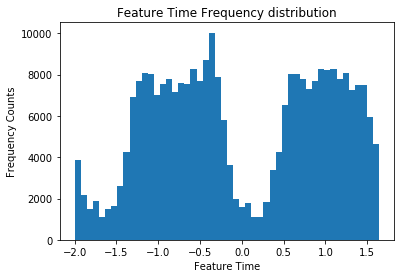

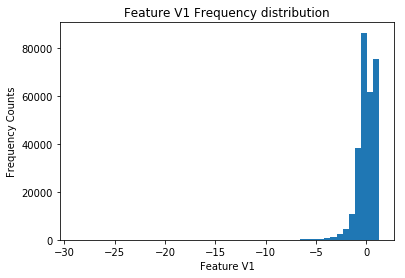

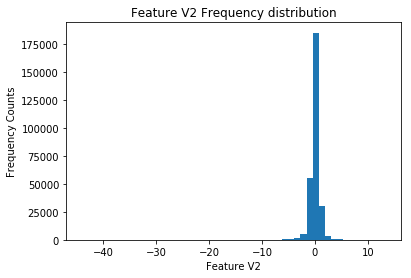

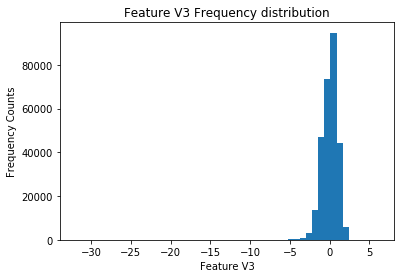

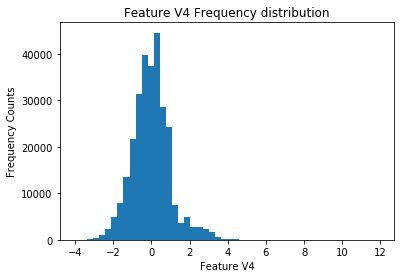

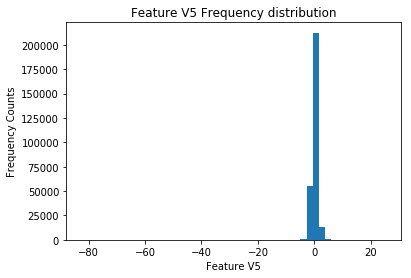

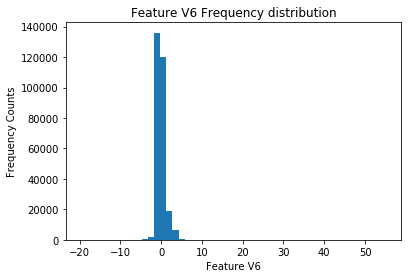

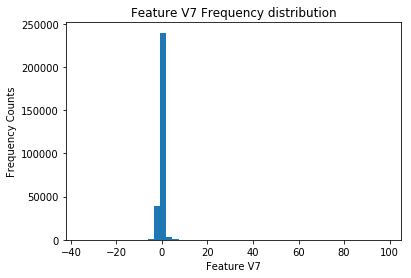

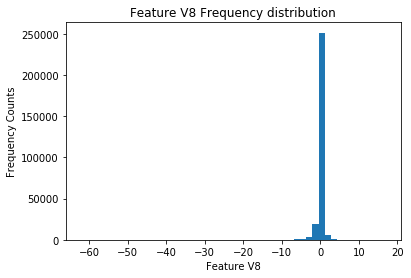

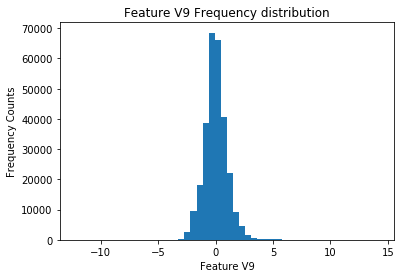

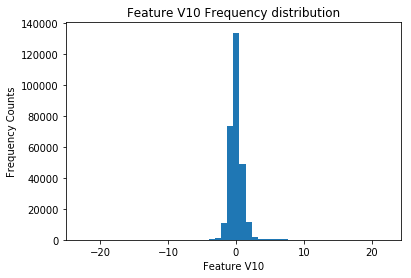

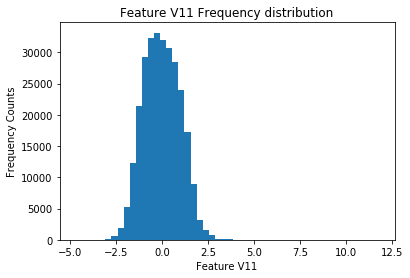

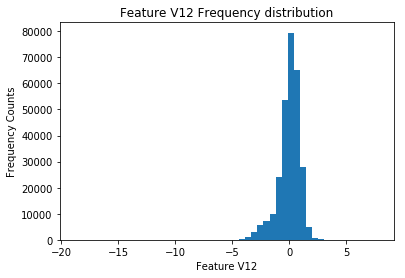

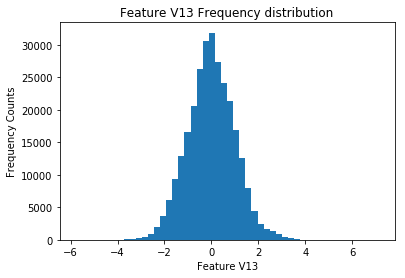

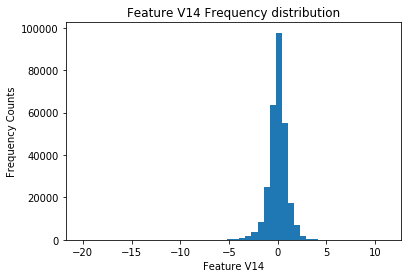

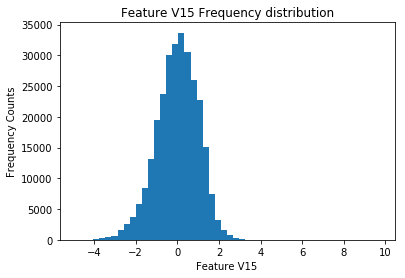

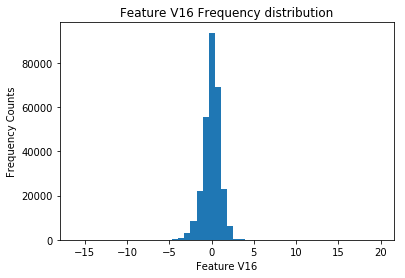

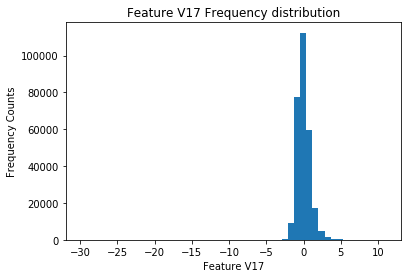

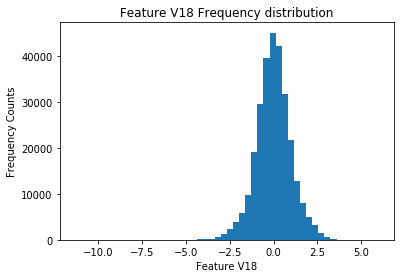

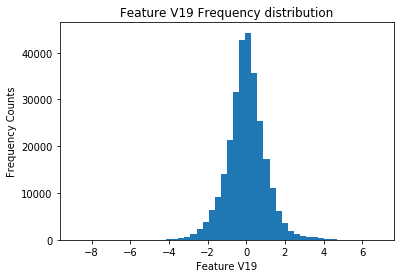

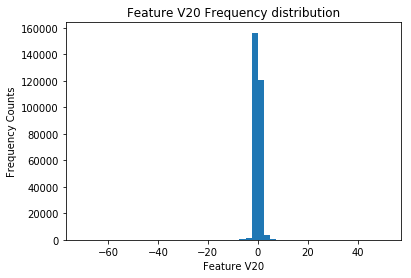

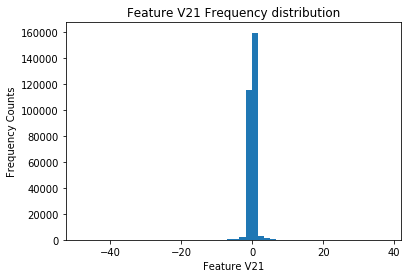

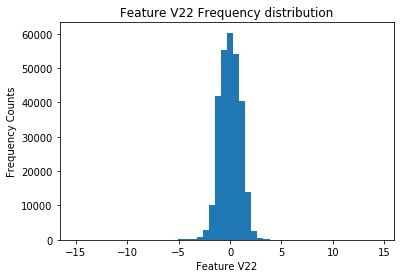

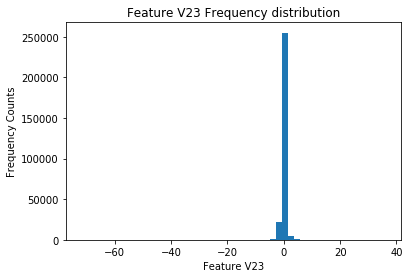

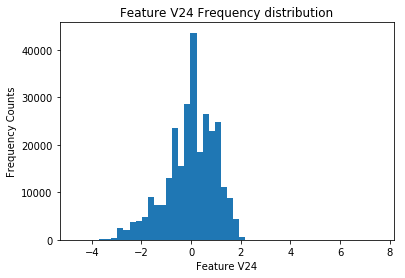

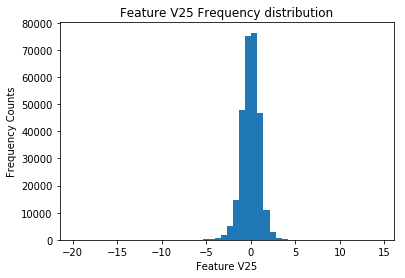

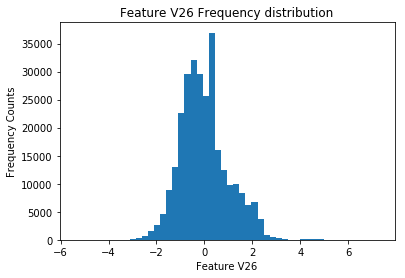

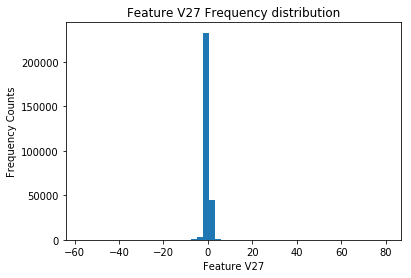

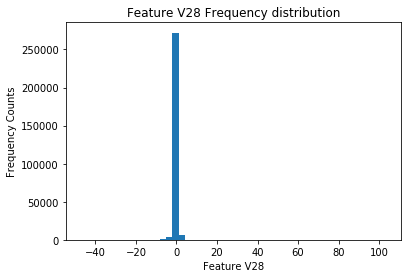

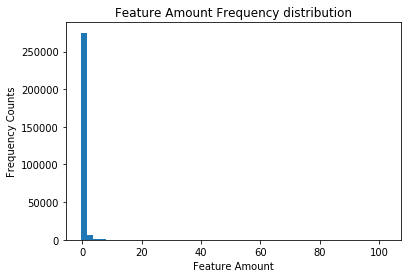

In [ ]:
for f in features:
  X = df[f].values
  plt.figure()
  plt.hist(X,bins = 50)
  plt.title(f"Feature {f} Frequency distribution")
  plt.xlabel(f"Feature {f}")
  plt.ylabel("Frequency Counts")

# **GAN**
Reference: https://www.kaggle.com/jannesklaas/semi-supervised-gan-for-fraud-detection

In [ ]:
def generator_model(noise_input_feats, valid_output_feats):

  noise_input = keras.Input(shape = (noise_input_feats,))
  hidden_layer_1 = keras.layers.Dense(100,activation = "relu")(noise_input)
  # hidden_layer_1_1 = keras.layers.Dense(75,activation = "relu")(hidden_layer_1)
  # hidden_layer_1_2 = keras.layers.Dense(50,activation = "relu")(hidden_layer_1_1)
  hidden_layer_2 = keras.layers.Dense(30,activation = "relu")(hidden_layer_1)
  batch_norm = keras.layers.BatchNormalization(momentum = 0.5)(hidden_layer_2)
  output_layer = keras.layers.Dense(30,activation = "sigmoid")(batch_norm) #sigmoid didn't work great

  generator = keras.Model(inputs = noise_input, outputs = output_layer)
  print("Generator model: \n")
  generator.summary()
  return generator

In [ ]:
def discriminator_model(input_feats, valid_output_feats, num_classes = 2):

  sample_input = keras.Input(shape = (input_feats,))
  hidden_layer_1 = keras.layers.Dense(36,activation = "sigmoid")(sample_input)
  hidden_layer_2 = keras.layers.Dense(36,activation = "sigmoid")(hidden_layer_1)
  hidden_layer_3 = keras.layers.Dense(36,activation = "sigmoid")(hidden_layer_2)
  dropout = keras.layers.Dropout(rate = 0.2)(hidden_layer_3)
  output_layer = keras.layers.Dense(1,activation = "sigmoid")(dropout)

  discriminator = keras.Model(inputs = sample_input, outputs = output_layer)
  print("Discriminator model: \n")
  discriminator.summary()
  return discriminator

In [ ]:
def final_GD_model(G,D,noise_input_feats = 100,num_outputs = 1,lr = 0.005):
  noise_input = keras.Input(shape = (noise_input_feats,))
  generated_image = G(noise_input)
  D.trainable = False
  sample_validity = D(generated_image) #fix this in case you modify Discriminator
  final_GD = keras.Model(inputs = noise_input, outputs = sample_validity)
  final_GD.compile(loss = 'binary_crossentropy',
                   optimizer = keras.optimizers.Adam(lr = lr,beta_1 = 0.5))
  
  print("GD Model: \n")
  final_GD.summary()
  return final_GD

In [ ]:
num_features = 30
gen_model = generator_model(100,num_features)

Instructions for updating:
Colocations handled automatically by placer.
Generator model: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
batch_normalization_v1 (Batc (None, 30)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
Total params: 14,180
Trainable params: 14,120
Non-trainable params: 60
_________________________________________________________________


In [ ]:
disc_model = discriminator_model(num_features,1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Discriminator model: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 36)                1116      
_________________________________________________________________
dense_4 (Dense)              (None, 36)                1332      
_________________________________________________________________
dense_5 (Dense)              (None, 36)                1332      
_________________________________________________________________
dropout (Dropout)            (None, 36)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 37        
Tota

In [ ]:
lr = 1e-5
lr

1e-05

In [ ]:
keras.__version__

'2.2.4-tf'

In [ ]:
disc_model.compile(loss = 'binary_crossentropy',metrics = ['accuracy'],
                   optimizer = keras.optimizers.Adam(lr = lr,beta_1 = 0.5)
                   )

In [ ]:
GD_model = final_GD_model(gen_model,disc_model,lr = lr)

GD Model: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
model (Model)                (None, 30)                14180     
_________________________________________________________________
model_1 (Model)              (None, 1)                 3817      
Total params: 17,997
Trainable params: 14,120
Non-trainable params: 3,877
_________________________________________________________________


# **Training GAN for sample generation**
Reference: 
1. https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/

2. https://towardsdatascience.com/conquer-class-imbalanced-dataset-issues-using-gans-2482b52593aa

In [ ]:
CHECKPOINT = 'generator_model/'
!mkdir generator_model/

mkdir: cannot create directory ‘generator_model/’: File exists


In [ ]:
pos_data = df_train[df_train['Class'] == 1]

In [ ]:
pos_data = pos_data.drop(['Class'], axis = 1)

In [ ]:
pos_data = pos_data.reset_index(drop = True)

In [ ]:
pos_data

Time         V1         V2         V3        V4         V5        V6  \
0    0.115560 -11.472046   9.437218 -15.156861  4.982628 -10.301305 -0.346870   
1   -1.107056  -1.298716   1.276666  -3.279483  4.567698   2.303617 -2.295669   
2    0.844905   0.615505   1.968910  -3.984901  4.047439   1.123141 -1.741779   
3   -0.223396  -0.484471   2.105438  -4.273087  3.489768  -1.623675 -1.719628   
4    0.958214  -2.498772  -1.650893  -3.087377  1.771322  -1.459815  0.462909   
5   -0.557151   0.629709  -0.330841   0.720007  0.634323  -1.042031 -0.267025   
6   -1.634846   0.555670   0.548132   0.260540  2.243859   0.126297 -0.165806   
7    0.848423   0.116321   0.572708  -3.081764  2.179925  -1.383061 -0.781024   
8   -0.567682  -0.895909  -0.789773   0.207128  0.040098  -0.043953  0.054357   
9   -1.391212 -15.686828  10.152137 -20.617569  4.623134 -16.054659 -3.736352   
10   1.205682  -1.838931   2.006177  -4.946079  5.506083  -0.290759 -1.477033   
11  -1.815403  -1.116951   2.212782  -2.989443  1.933015  -1.542855 -1.756759   
12   1.391272  -0.333772   3.040315  -5.471244  5.487189  -0.158383 -2.064944   
13  -0.800428   0.005601   1.460473  -2.798456  2.450310  -0.454588 -0.970895   
14  -0.698492  -0.784499   0.916552   0.245746  1.619194  -0.383692  0.750590   
15  -1.621136  -2.666188   4.233827  -8.956539  6.096008  -8.145390  0.505573   
16   0.165538  -2.565512   3.168443  -6.040342  5.964547  -2.496244 -1.371264   
17   0.841493  -0.043926   1.959158  -2.469587  4.271242   0.422342 -0.518201   
18   1.203870  -3.400437   2.331984  -4.187813  1.306111  -1.800079 -1.415676   
19  -1.128327  -5.281099   3.829792  -8.797981  6.313250  -7.245725 -2.125771   
20  -0.987513   0.184012   0.879127  -1.473156  1.442496  -0.899693 -1.296633   
21  -0.796194  -0.655619   1.498032  -1.891063  1.645790  -0.997870 -0.711041   
22  -1.115396  -9.828248   5.642182 -13.347174  5.530860 -11.368169 -1.251725   
23  -0.725724  -2.043679   0.355686  -1.247439  3.056332  -2.197636  0.932432   
24   1.303658   0.100864   0.716831   0.228522  2.040123   1.020552 -0.377809   
25   0.723973   0.145911   0.032415  -0.491912  2.028332   1.011954 -0.400940   
26  -1.411662   0.144820   0.588945  -0.968468  1.361091  -1.390148 -0.847750   
27  -0.019441  -5.157306   3.730684  -8.599962  5.475621  -6.308275 -2.880253   
28   0.015752  -8.374937   7.055890 -13.084954  7.401336  -9.150995 -0.901891   
29  -1.464947  -8.871102   6.573025 -13.498892  4.277795  -9.779814 -3.127427   
..        ...        ...        ...        ...       ...        ...       ...   
285 -0.019631  -6.591067   4.562412 -13.583779  5.281321  -8.407467 -3.858962   
286  1.481034  -3.855111  -0.216489  -2.540345  1.760078   1.812294  1.001237   
287 -0.078686  -0.955316   0.946802  -0.932883  0.475394  -0.204834  0.885777   
288 -0.405006  -1.474460   1.427755  -2.687728  2.818821  -2.516339 -0.960873   
289  1.024135  -2.701381   0.223888  -3.588369  1.699215   0.505062 -1.499792   
290 -1.241447  -1.052557   2.048000  -2.610710  3.978334  -2.237507 -0.940242   
291 -1.214046  -4.070696  -3.154324  -1.989579  3.128051   1.648770 -2.547693   
292 -1.393950 -14.298651   9.474905 -19.172643  4.540724 -14.777029 -3.624116   
293 -1.716226  -2.802985   5.035255  -8.454033  6.079353  -2.256947 -2.386622   
294  0.142919   0.465702   0.698072  -3.052001  1.481259  -0.344989 -1.564871   
295  0.736146  -1.252512   1.961548  -4.373292  2.542903  -0.785240 -1.305326   
296 -0.127927   0.981462   0.580617  -1.365975  2.713205   1.210136  0.578834   
297 -0.709823  -1.417809   0.417779  -0.922517  1.064116  -0.847812 -0.097654   
298 -0.069229   1.000468   0.992404  -2.875901  1.683895   1.533414 -1.188286   
299  0.305110  -0.516692   2.034970  -3.669504  4.835849  -0.219048  0.072895   
300  0.305089   0.379480   1.708528  -3.862332  4.128560   0.370726 -0.461348   
301 -0.416548  -0.223944   0.601061   0.426980  0.226348   0.446261 -1.010807   
302 -1.835242   0.357692   1.476023  -3.

In [ ]:
def get_noise(noise_input_feats, num_fake):
  noise = np.random.randn(noise_input_feats * num_fake)
  noise = noise.reshape(num_fake, noise_input_feats)
  return noise

In [ ]:
def real_samples(data, num_real):
  ind = np.random.randint(0, data.shape[0], num_real)
  X_real = data.iloc[ind,:]
  y_real = np.ones((num_real, 1))
  return X_real, y_real

In [ ]:
def fake_samples(gen_model, num_fake, noise_input_feats = 100):
  noise_data = get_noise(noise_input_feats,num_fake)
  X_fake = gen_model.predict(noise_data)
  y_fake = np.zeros((num_fake,1))
  return X_fake, y_fake

In [ ]:
def report_errors(epoch, g_model, d_model, data, noise_input_feats = 100, num_samples=50, when_epoch = 10):
  X_real, y_real = real_samples(data, num_samples)
  _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)

  x_fake, y_fake = fake_samples(g_model, num_samples,noise_input_feats)
  _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)

  print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
  if epoch % when_epoch == 0:
    filename = 'generator_model_%03d.h5' % (epoch)
    g_model.save(CHECKPOINT + str(filename))
  

  return (acc_real*100, acc_fake*100)

In [ ]:
def plot_vals(x,y,title, xtitle = 'epochs',ytitle = 'loss'):
  plt.plot(x,y)
  plt.xlabel(xtitle)
  plt.ylabel(ytitle)
  plt.title(title)
  plt.show()

In [ ]:
def train_gan(gen_model,disc_model, gan_model, data, rf_ratio = 0.5,noise_input_feats = 100, num_epochs = 200, batch_size = 30):
  num_total_available = int(data.shape[0])
  num_batches_per_epoch = int (num_total_available // batch_size)
  gen_losses = []
  real_accs = []
  fake_accs = []
  total_disc_accs = []
  total_gen_loss = 0
  
  total_d_loss = 0
  disc_losses = []
  num_real = int(batch_size * rf_ratio)
  num_fake = batch_size - num_real
  for epoch in range(1, 1 + num_epochs):
    avg_disc_acc = 0
    for batch in range(1, 1 + num_batches_per_epoch):
      X_real, y_real = real_samples(data, num_real)
      X_fake, y_fake = fake_samples(gen_model, num_fake)

      X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))


      labels = keras.utils.to_categorical(y,num_classes = 2)
      
      disc_loss,disc_acc = disc_model.train_on_batch(X, y) #discriminator loss for every batch
      avg_disc_acc += disc_acc


      X_noise = get_noise(noise_input_feats,batch_size)
      y_noise = np.ones((batch_size, 1))
      g_loss = gan_model.train_on_batch(X_noise, y_noise)

      total_gen_loss += g_loss
      total_d_loss += disc_loss

      print('Epoch: %d, Batch: %d/%d, Loss discriminator=%.3f, Loss generator=%.3f' % (epoch, batch, num_batches_per_epoch, disc_loss, g_loss))

    

    total_gen_loss /= (num_batches_per_epoch * batch_size)
    total_d_loss /= (num_batches_per_epoch * batch_size)
    avg_disc_acc /= num_batches_per_epoch
    gen_losses.append(total_gen_loss)
    disc_losses.append(total_d_loss)
    total_disc_accs.append(avg_disc_acc * 100.00)


    real_acc, fake_acc = report_errors(epoch, gen_model,disc_model, data)
    real_accs.append(real_acc)
    fake_accs.append(fake_acc)
    print('='*100)


  
  plot_vals(list(range(1, 1 + num_epochs)),gen_losses,"GAN model loss",'epochs','GAN Loss')
  plot_vals(list(range(1, 1 + num_epochs)),disc_losses,"Disc model loss",'epochs','Disc Loss')
  plot_vals(list(range(1, 1 + num_epochs)),real_accs, 'Real Accuracy', 'epochs','Accuracy %')
  plot_vals(list(range(1, 1 + num_epochs)),fake_accs, 'Fake Accuracy', 'epochs','Accuracy %')
  plot_vals(list(range(1, 1 + num_epochs)),total_disc_accs, 'Total Discriminator Accuracy', 'epochs','Accuracy %')

  return gen_model, disc_model, gan_model

Instructions for updating:
Use tf.cast instead.
Epoch: 1, Batch: 1/5, Loss discriminator=0.729, Loss generator=0.670
Epoch: 1, Batch: 2/5, Loss discriminator=0.749, Loss generator=0.642
Epoch: 1, Batch: 3/5, Loss discriminator=0.715, Loss generator=0.671
Epoch: 1, Batch: 4/5, Loss discriminator=0.679, Loss generator=0.654
Epoch: 1, Batch: 5/5, Loss discriminator=0.704, Loss generator=0.716
>Accuracy real: 100%, fake: 0%
Epoch: 2, Batch: 1/5, Loss discriminator=0.709, Loss generator=0.671
Epoch: 2, Batch: 2/5, Loss discriminator=0.675, Loss generator=0.683
Epoch: 2, Batch: 3/5, Loss discriminator=0.680, Loss generator=0.647
Epoch: 2, Batch: 4/5, Loss discriminator=0.703, Loss generator=0.673
Epoch: 2, Batch: 5/5, Loss discriminator=0.733, Loss generator=0.678
>Accuracy real: 100%, fake: 0%
Epoch: 3, Batch: 1/5, Loss discriminator=0.701, Loss generator=0.657
Epoch: 3, Batch: 2/5, Loss discriminator=0.699, Loss generator=0.691
Epoch: 3, Batch: 3/5, Loss discriminator=0.670, Loss generator

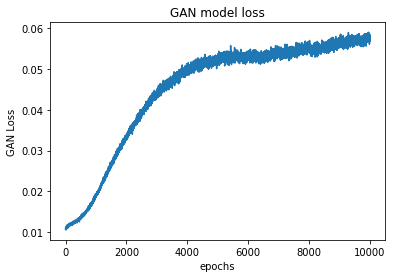

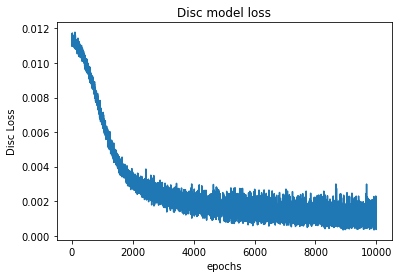

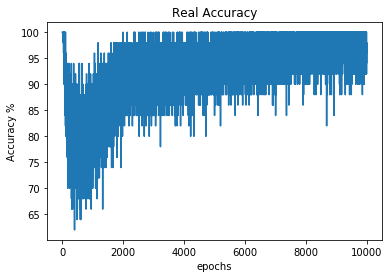

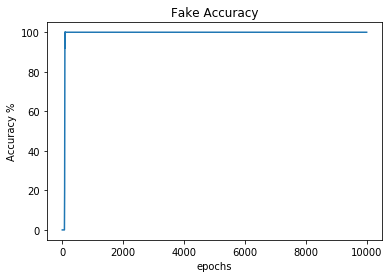

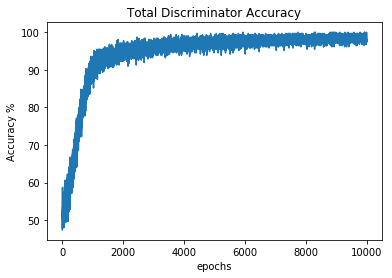

In [ ]:
final_gen, final_disc, final_gan = train_gan(gen_model, disc_model, GD_model, 
                                             pos_data,num_epochs = 10000,batch_size = 62)

In [ ]:
final_gan.metrics_names

['loss']

In [ ]:
final_gen.save("final_generator.h5")
final_disc.save('final_discriminator.h5')
final_gan.save('final_gan.h5')